### Import Essential Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from six import StringIO
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### About the Dataset

In [ ]:
df = pd.read_csv("C:/Users/HP/Desktop/Lina's FYP - Copy/Implementation/iot_traffic_data.csv")
df.head(10)

#### Dataset Dimensions

In [ ]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

#### Concise summary of dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    10000 non-null  object
 1   Device_Type  10000 non-null  object
 2   Src_IP       10000 non-null  object
 3   Dst_IP       10000 non-null  object
 4   Src_Port     10000 non-null  int64 
 5   Dst_Port     10000 non-null  int64 
 6   Protocol     10000 non-null  object
 7   Packet_Size  10000 non-null  int64 
 8   Flags        7983 non-null   object
 9   Payload      10000 non-null  int64 
 10  Activity     10000 non-null  object
 11  label        10000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 937.6+ KB


#### Descriptive statistics of dataset

In [40]:
df.describe()

,Src_Port,Dst_Port,Packet_Size,Payload,label
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33569.91930,33085.370100,767.780500,702.864300,0.488700
std,18582.78581,18391.580353,420.954947,405.873709,0.499897
min,1005.00000,1005.000000,40.000000,0.000000,0.000000
25%,17528.00000,17242.000000,407.750000,346.000000,0.000000
50%,33673.00000,32871.500000,770.000000,707.500000,0.000000
75%,49607.00000,48800.750000,1128.000000,1053.000000,1.000000
max,65488.00000,65530.000000,1500.000000,1400.000000,1.000000


#### heatmap of missing values

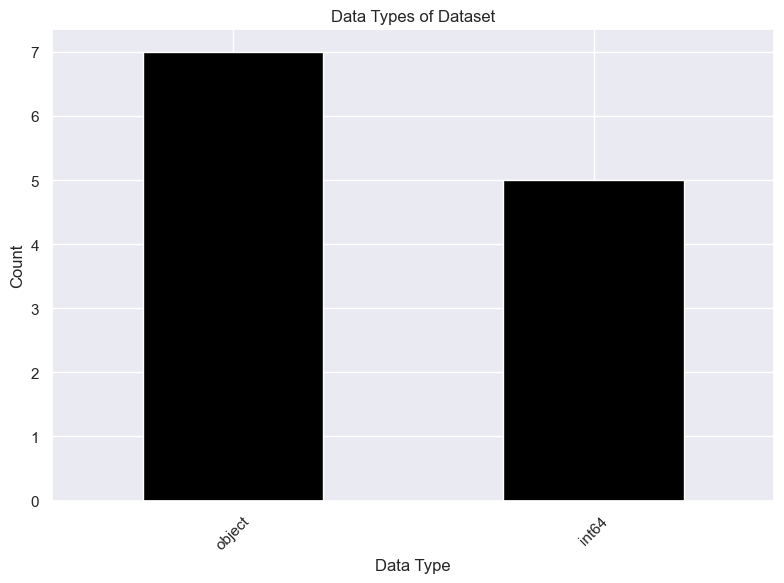

In [41]:
data = pd.read_csv("C:/Users/HP/Desktop/Lina's FYP - Copy/Implementation/iot_traffic_data.csv")
data_types = data.dtypes.value_counts()

plt.figure(figsize=(8,6))
data_types.plot(kind='bar', color='black')
plt.title("Data Types of Dataset")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Count of null values in each feature 

In [42]:
df.isnull().sum()

Timestamp         0
Device_Type       0
Src_IP            0
Dst_IP            0
Src_Port          0
Dst_Port          0
Protocol          0
Packet_Size       0
Flags          2017
Payload           0
Activity          0
label             0
dtype: int64

In [43]:
(df.isnull().sum()/df.isnull().count())*100

Timestamp       0.00
Device_Type     0.00
Src_IP          0.00
Dst_IP          0.00
Src_Port        0.00
Dst_Port        0.00
Protocol        0.00
Packet_Size     0.00
Flags          20.17
Payload         0.00
Activity        0.00
label           0.00
dtype: float64

#### Drop rows with null values

In [44]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [45]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

Timestamp      0
Device_Type    0
Src_IP         0
Dst_IP         0
Src_Port       0
Dst_Port       0
Protocol       0
Packet_Size    0
Flags          0
Payload        0
Activity       0
label          0
dtype: int64
This Dataframe has 7983 rows and 12 columns after removing null values


#### Distribution of Target Class

In [46]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 48.9 %
Number of DDOS attacks that has not occured : 51.1 %


#### Barplot of Target Class

C:\Users\HP\AppData\Local\Temp\ipykernel_5200\4157118356.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100


Text(0, 0.5, 'Frequency %')

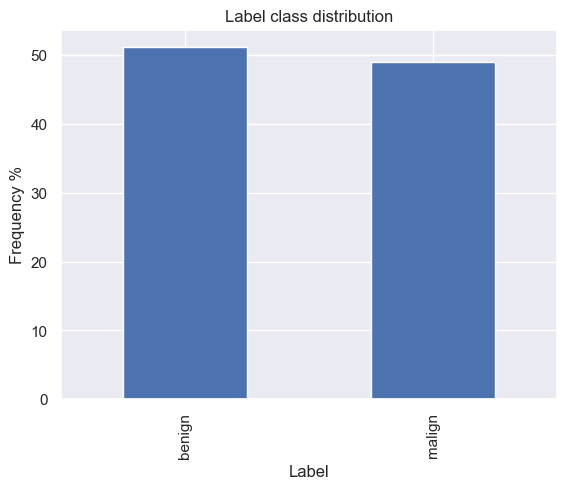

In [47]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Columns in the dataset

In [48]:
df.columns

Index(['Timestamp', 'Device_Type', 'Src_IP', 'Dst_IP', 'Src_Port', 'Dst_Port',
       'Protocol', 'Packet_Size', 'Flags', 'Payload', 'Activity', 'label'],
      dtype='object')

#### Unique values in each column

In [49]:
print(df.apply(lambda col: col.unique()))

Timestamp      [25:24.2, 04:45.2, 15:47.2, 07:05.2, 15:22.2, ...
Device_Type    [Smart Lock, Smart Thermostat, Smart LED Light...
Src_IP         [75.191.213.34, 159.86.87.106, 238.245.183.93,...
Dst_IP         [91.126.134.188, 64.202.179.201, 81.57.157.140...
Src_Port       [64927, 22858, 21042, 3799, 2827, 14452, 44944...
Dst_Port       [5866, 61498, 4709, 31702, 39385, 32565, 49648...
Protocol                                              [TCP, UDP]
Packet_Size    [776, 1341, 1428, 227, 1303, 269, 314, 1164, 1...
Flags                                       [FIN, RST, ACK, SYN]
Payload        [178, 1238, 1273, 196, 1149, 202, 45, 674, 710...
Activity                    [sending data, receiving data, idle]
label                                                     [1, 0]
dtype: object


#### Numerical Features

In [50]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 5 and they are : 
 ['Src_Port', 'Dst_Port', 'Packet_Size', 'Payload', 'label']


#### Categorical Features

In [51]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 7 and they are : 
 ['Timestamp', 'Device_Type', 'Src_IP', 'Dst_IP', 'Protocol', 'Flags', 'Activity']


#### Number of Unique values in the numerical features 

In [52]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

Src_Port       7493
Dst_Port       7536
Packet_Size    1455
Payload        1399
label             2
dtype: int64

#### Discrete numerical features

In [53]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 0 and they are : 
 []


In [54]:
df[discrete_feature].head(10)

""
0
1
2
3
5
7
8
9
10
11


#### Continuous features

In [55]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 4 and they are : 
 ['Src_Port', 'Dst_Port', 'Packet_Size', 'Payload']


### Exploratory Data Analysis

#### Plotting function definition 

In [56]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

In [ ]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the distribution of numerical discrete features

In [26]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [27]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Checking for outliers in Packet count feature

In [29]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['Timestamp', 'Device_Type', 'Src_IP', 'Dst_IP', 'Protocol', 'Flags', 'Activity']


### Encoding categorical features

In [30]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 7983 rows and 21444 columns after encoding


In [31]:
#dataframe after encoding
df.head(10)

,Src_Port,Dst_Port,Packet_Size,Payload,label,Timestamp_00:00.4,Timestamp_00:01.3,Timestamp_00:02.2,Timestamp_00:02.3,Timestamp_00:03.2,...,Dst_IP_99.77.74.141,Dst_IP_99.81.174.168,Dst_IP_99.87.115.152,Dst_IP_99.97.88.84,Protocol_UDP,Flags_FIN,Flags_RST,Flags_SYN,Activity_receiving data,Activity_sending data
0,64927,5866,776,178,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,22858,61498,1341,1238,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,21042,4709,1428,1273,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3799,31702,227,196,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
5,2827,39385,1303,1149,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,14452,32565,269,202,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,44944,49648,314,45,1,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
9,48337,45174,1164,674,1,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
10,21249,17171,1302,710,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
11,7610,23240,675,913,0,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True


In [32]:
df.dtypes

Src_Port                   int64
Dst_Port                   int64
Packet_Size                int64
Payload                    int64
label                      int64
                           ...  
Flags_FIN                   bool
Flags_RST                   bool
Flags_SYN                   bool
Activity_receiving data     bool
Activity_sending data       bool
Length: 21444, dtype: object

### Split into Independent and dependent variables

In [33]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [34]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [70-30]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(5588, 21443) (2395, 21443)


#### Deep Neural Network

In [217]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [218]:
model = Sequential()
model.add(Dense(28, input_shape=(53,), activation="relu", name="Hidden_Layer_1"))
model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1512      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1813 (7.08 KB)
Trainable params: 1813 (7.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model fitting 

In [219]:
print(X_train.shape)
print(X_test.shape)

(65556, 53)
(28096, 53)


In [220]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100


2049/2049 - 8s - loss: 0.2840 - accuracy: 0.8799 - val_loss: 0.1544 - val_accuracy: 0.9438 - 8s/epoch - 4ms/step
Epoch 2/100
2049/2049 - 6s - loss: 0.1264 - accuracy: 0.9550 - val_loss: 0.1100 - val_accuracy: 0.9642 - 6s/epoch - 3ms/step
Epoch 3/100
2049/2049 - 5s - loss: 0.0969 - accuracy: 0.9672 - val_loss: 0.0915 - val_accuracy: 0.9703 - 5s/epoch - 3ms/step
Epoch 4/100
2049/2049 - 5s - loss: 0.0827 - accuracy: 0.9710 - val_loss: 0.0797 - val_accuracy: 0.9728 - 5s/epoch - 3ms/step
Epoch 5/100
2049/2049 - 5s - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.0735 - val_accuracy: 0.9741 - 5s/epoch - 3ms/step
Epoch 6/100
2049/2049 - 5s - loss: 0.0669 - accuracy: 0.9751 - val_loss: 0.0662 - val_accuracy: 0.9750 - 5s/epoch - 3ms/step
Epoch 7/100
2049/2049 - 5s - loss: 0.0632 - accuracy: 0.9758 - val_loss: 0.0617 - val_accuracy: 0.9755 - 5s/epoch - 3ms/step
Epoch 8/100
2049/2049 - 6s - loss: 0.0578 - accuracy: 0.9780 - val_loss: 0.0551 - val_accuracy: 0.9790 - 6s/epoch - 3ms/ste

## Plotting Loss v/s Epochs 

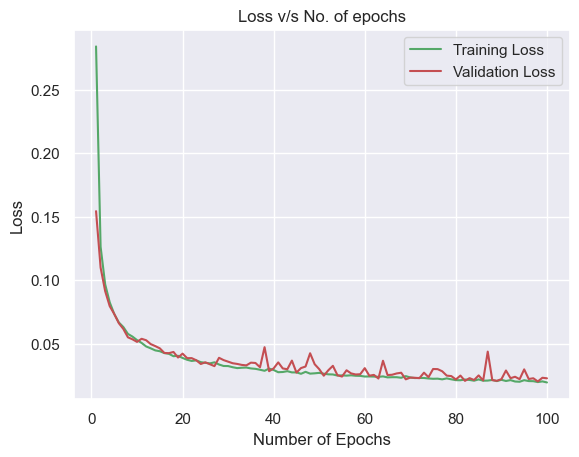

In [221]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

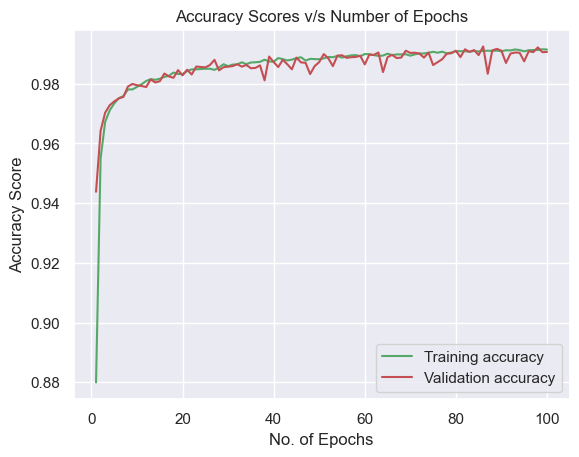

In [222]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [223]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

878/878 [==============================] - 2s 2ms/step - loss: 0.0229 - accuracy: 0.9906
Accuracy of Deep neural Network : 99.06


## Classification Report 

In [13]:
print(classification_report(y_test, y_pred, target_names = labels))

NameError: name 'y_test' is not defined

## Plotting Confusion Matrix

In [125]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

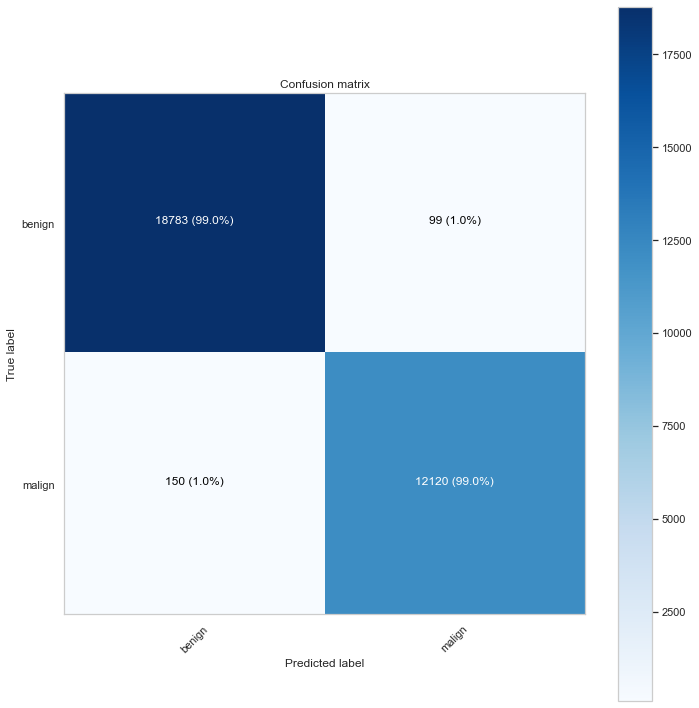

In [126]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

## Displaying ROC-AUC curve

In [87]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

Area under the curve(AUC) is: 0.9998218809615622


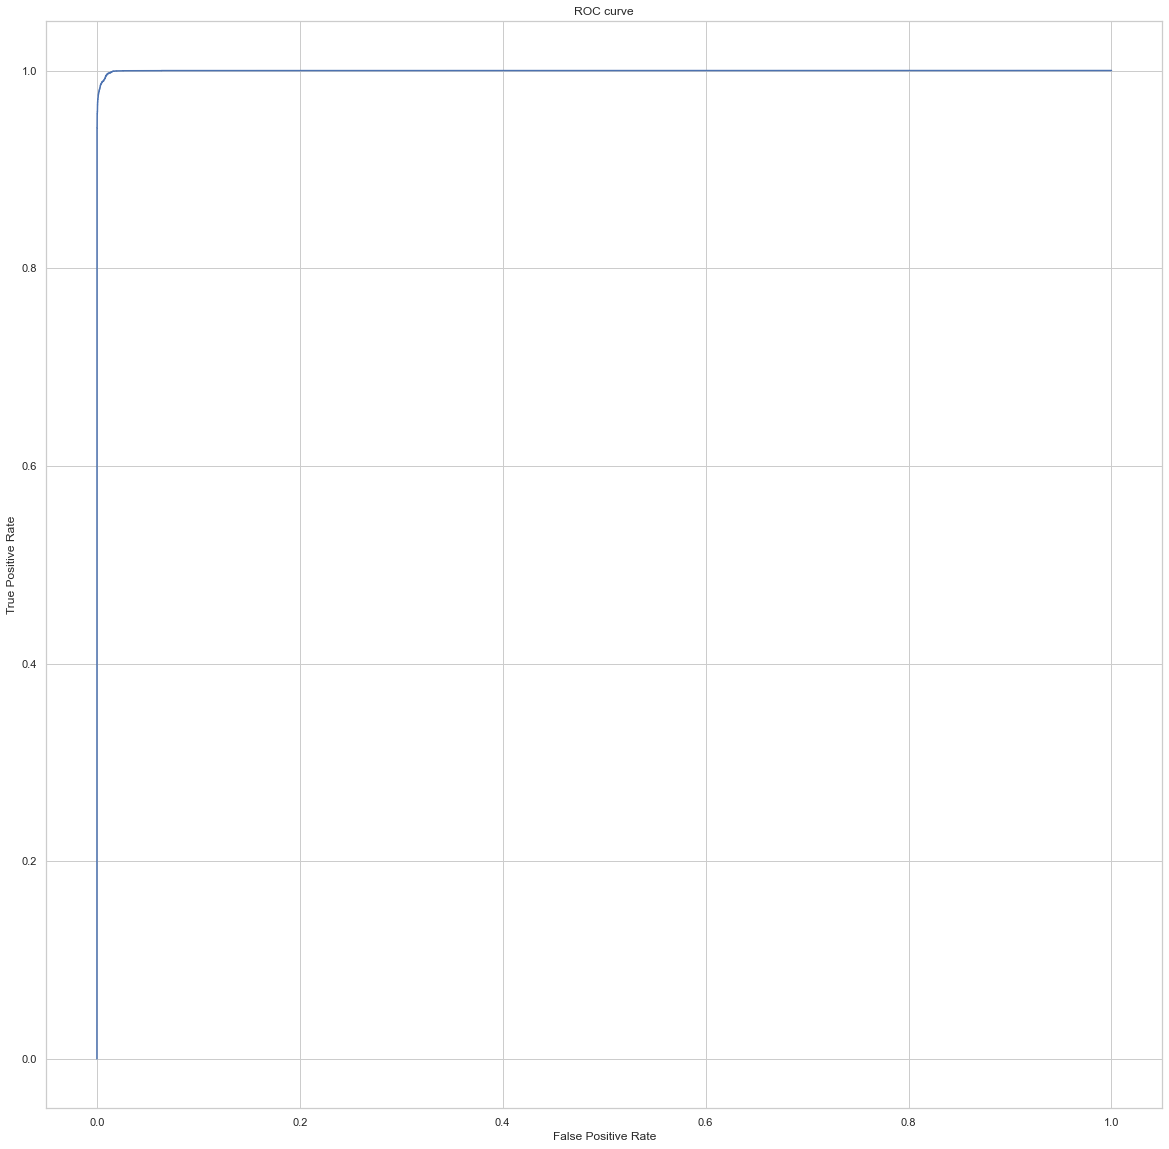

In [88]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(X_train, X_test, y_train, y_test)    
y_predicted = model(X_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()